In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [ ]:
q = 0.1 #corruption  
fname = "DATA/dataRBM_q"+str(q)+"_5state.csv"
# Visible data
v = np.loadtxt(fname,delimiter=",",dtype=int)
N = len(v)
# Length of sample
L = len(v[0])
print(f"Each of N={N} data samples has L={L} digits.")
q = 0
fname = "DATA/dataRBM_q"+str(q)+"_5state.csv"
# Visible data
v_true = np.loadtxt(fname,delimiter=",",dtype=int)

for n in range(10):
    print(v[n])

print("...")

# Choice of using -1/+1 and not 0,1
SPINS = False
if SPINS:
    vmin = -1
# The energy gap now is 2 not 1
    GAP  = 2  
    v = 2*v -1
else:
    vmin = 0
    GAP = 1

# Store initial values
v0 = np.zeros_like(v)
v0[:] = v[:]


for n in range(10):
    print(v[n])

print("...")

Each of N=10000 data samples has L=8 digits.
[1 1 0 0 1 1 0 0]
[1 1 0 0 0 1 1 0]
[0 1 0 1 1 1 0 0]
[0 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1]
[1 1 1 1 0 1 1 1]
[0 0 1 1 1 0 1 1]
[0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 0 0]
[0 0 0 1 1 0 1 1]
...
[1 1 0 0 1 1 0 0]
[1 1 0 0 0 1 1 0]
[0 1 0 1 1 1 0 0]
[0 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1]
[1 1 1 1 0 1 1 1]
[0 0 1 1 1 0 1 1]
[0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 0 0]
[0 0 0 1 1 0 1 1]
...


In [ ]:
# Number of hidden units
M = 10

# This is good, is written in the review the denom is prop to the lenght of M
sigma = np.sqrt(4. /float(L + M))
np.random.seed(12345)

# numbers in [-sigma;sigma]
w = sigma * (2*np.random.rand(L,M) - 1) #matrix of weights
a = sigma * (2*np.random.rand(L) - 1)
b = np.zeros(M)
print(f"w = {w}\na = {a}\nb = {b}")
w0,a0,b0 = np.zeros_like(w),np.zeros_like(a),np.zeros_like(b)
w0[:],a0[:],b0[:] = w[:],a[:],b[:]

w = [[ 4.05045937e-01 -1.73122787e-01 -2.98004202e-01 -2.78543241e-01
   6.38517698e-02  9.00804098e-02  4.37948489e-01  1.44416752e-01
   2.34671428e-01  1.44787063e-01]
 [ 2.33547762e-01  4.34924162e-01 -4.63495958e-01 -3.71047800e-01
  -1.89783959e-01  1.47465878e-01  2.92094076e-01  3.50890817e-01
   4.38073956e-01  2.10892568e-01]
 [ 1.34327027e-01  2.05017240e-01 -3.05479489e-02 -1.64440343e-01
  -5.69036113e-02  2.16552944e-01  4.65761418e-01  1.66758135e-01
   2.74190099e-01 -3.10265013e-01]
 [-4.46090781e-01  2.83191782e-01  3.80633259e-01 -4.48139566e-01
  -7.78070279e-03  2.47536092e-02  9.08547459e-02 -4.22418477e-01
   3.72493979e-01  2.15211419e-01]
 [ 3.00143269e-01  2.10013386e-04  2.92449379e-01 -3.80924527e-01
  -2.64976440e-01 -2.27481850e-01 -3.00701835e-02 -3.83033119e-02
   1.97527715e-01 -3.03534537e-01]
 [ 2.96512353e-02 -3.13255631e-01  2.53440193e-01  4.03683065e-01
   1.03231611e-01 -3.29810164e-01 -9.78003755e-03 -1.15640287e-01
   3.28664563e-01  3.87586184

### Way to plots the Boltzmann machine

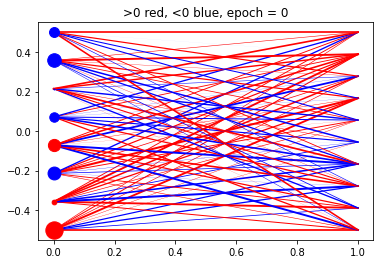

In [ ]:
def create_coord(np,x0):
    x = [x0] * np
    y = list(range(np))
    #y = y/(np - 1.) - .5
    for i in range(np):
            y[i] = y[i]/(np - 1.) - .5
    return(x,y)

(x1,y1) = create_coord(L,0)
(x2,y2) = create_coord(M,1)
             
def mycolor(val):
    if val>0:
        return "red"
    elif val<0:
        return "blue"
    return"black"

def plotgraph(w,a,b,epoch=0):
    A = 2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]), (y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*np.abs(w[i][j]))
    A = 300./(a.max() + b.max())
    # plot units
    for i in range(L):
        plt.scatter(x1[i],y1[i],s=A*np.abs(a[i]),zorder=2,c=mycolor(a[i]))
    A = 300./(a.max() + b.max())
    # plot units
    for j in range(M):
        plt.scatter(x2[j],y2[j],s=A*np.abs(b[j]),zorder=2,c=mycolor(b[j]))
    plt.title(f">0 red, <0 blue, epoch = {epoch}")
    plt.show()

    

plotgraph(w,a,b)

In [ ]:
def activate(v_in, wei, bias, DE, β=1., info=False):
    act = np.dot(v_in,wei) + bias
    prob = 1. / (1. + np.exp(-DE*β*act))
    n = len(act)
    v_out = np.full(n,vmin)
    # Stochastic part
    v_out[np.random.random_sample(n) < prob] = 1
    if info:
        print("input = ",v_in)
        print("act   = ",act)
        print("prob  = ",prob)
        print("out   = ",v_out)
    return (v_out)



activate(v[0],w,b,GAP,True)

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

## Real Boltzmann machine

In [ ]:
def RBM(w,v,a,b,β = 1,nepoch=50,mini=500,l_rate=1.0,ev=False,plot=False):
    m = 0
    ws  = np.zeros_like(w)
    asa = np.zeros_like(a)
    bs  = np.zeros_like(b)
    ws[:]  = w[:]
    asa[:] = a[:]
    bs[:]  = b[:]
    for epoch in range(1,nepoch+1):
        for n in range(N):
            if m==0:
                # initialize the minibatch
                v_data, v_model   = np.zeros(L), np.zeros(L)
                h_data, h_model   = np.zeros(M), np.zeros(M)
                vh_data, vh_model = np.zeros((L,M)), np.zeros((L,M))
            if ev:
                # Positive CD phase
                h  = activate(v[n],ws,bs,GAP)
                # Negative CD phase
                vf = activate(h,ws.T,asa,GAP,β)
                # Positive CD phase nr 2
                hf = activate(vf,ws,bs,GAP,β)
            else:
                # Positive CD phase
                h  = activate(v[n],ws,bs,GAP,β)
                # Negative CD phase
                vf = activate(h,ws.T,asa,GAP,β)
                # Positive CD phase nr 2
                hf = activate(vf,ws,bs,GAP,β)
            v_data  += v[n]
            v_model += vf
            h_data  += h                
            h_model += hf

            vh_data  += np.outer(v[n].T, h)
            vh_model += np.outer(vf.T, hf)

            m += 1

            if m==mini:
                C  = l_rate / mini
                dw = C*(vh_data - vh_model)
                da = C*(v_data - v_model)
                db = C*(h_data - h_model)
                # if epoch <=2 and n>=mini:
                #     print("--- epoch = ",epoch, "   n = ",n, "    m = ",m)
                #     print("dw = ",dw)
                #     print("da = ",da)
                #     print("db = ",db)


                ws += dw
                asa += da
                bs += db
                m = 0
        # randomize order
        np.random.shuffle(v)
        l_rate = l_rate /(0.05 * l_rate + 1) 
        if plot:
            if epoch %5 ==0:
                plotgraph(ws,asa,bs,epoch)
                print("l_rate = ",l_rate)
    return ws,asa,bs

In [ ]:
def comparison(x,x_true,pix):
    """
    Input:
        x -> Vector to compare
        x_true -> True vector
        pix -> pixel of confident
    Output:
        c/N -> rateo of pattern retrived by the algorithm
    """
    # x = np.asarray(x)
    # x_true = np.asarray(x_true)
    N = x.shape[0]
    K = x.shape[1]
    print(N)
    print(K)
    if (x.shape != x_true.shape):
        exit("Different shapes of the vectors to compare")
    c = 0
    for i in range(N):
        k = 0
        for j in range(K):
            if (x[i,j]==x_true[i,j]):
                k+=1
        if (k> K-pix):
            c += 1
    
    return c/N


## Defining the costants of the system

In [ ]:
l_rate = 1.0 
# minibatches
mini, m = 500, 0
# epochs
nepoch = 50

Run the RBM for different $\beta$-s

In [ ]:
w1,a1,b1 = RBM(w, v, a, b, β=1, plot=False, ev=False)

***Visible data (q=0)***

In [ ]:
q = 0
fname = "DATA/dataRBM_q"+str(q)+"_5state.csv"
# Visible data
v_true = np.loadtxt(fname,delimiter=",",dtype=int)

for i in range(0,20):
    print(v_true[i])

[1 1 0 0 1 1 0 0]
[1 1 0 0 1 1 0 0]
[1 1 0 0 1 1 0 0]
[0 0 1 1 0 0 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[0 0 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 0 0]
[0 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[1 1 0 0 1 1 0 0]
[1 1 0 0 1 1 0 0]
[1 1 0 0 1 1 0 0]
[0 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[1 1 0 0 1 1 0 0]
[1 1 1 1 1 1 1 1]
[0 0 1 1 1 1 0 0]
[1 1 1 1 1 1 1 1]


In [ ]:
pixi = 2
print("------------ β=1 ------------ ")
v1 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=1)
    v1[n] = activate(h,w1.T,a1,GAP,β=1)
    
for n in range(10):
    print((v0[n]).astype(int),(v1[n]).astype(int))

print(f"The score of the RBM with β = 1 and a confidence of {pixi} is {comparison(v1,v_true,pixi)} ")
print("------------ β=5 ------------ ")
v2 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=5)
    v2[n] = activate(h,w1.T,a1,GAP, β=5)
    
for n in range(10):
    print((v0[n]).astype(int),(v2[n]).astype(int))    

print(f"The score of the RBM with β = 5 and a confidence of {pixi} is {comparison(v2,v_true,pixi)} ")

print("----------- β=10 ----------- ")
v3 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=10)
    v3[n] = activate(h,w1.T,a1,GAP,β=10)
    
for n in range(10):
    print((v0[n]).astype(int),(v3[n]).astype(int))

print(f"The score of the RBM with β = 10 and a confidence of {pixi} is {comparison(v3,v_true,pixi)} ")
    
print("----------- β=15 ----------- ")
v4 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=15)
    v4[n] = activate(h,w1.T,a1,GAP,β=15)
    
for n in range(10):
    print((v0[n]).astype(int),(v4[n]).astype(int))

print(f"The score of the RBM with β = 15 and a confidence of {pixi} is {comparison(v4,v_true,pixi)} ")

------------ β=1 ------------ 
[1 1 0 0 1 1 0 0] [1 1 0 0 1 1 0 0]
[1 1 0 0 0 1 1 0] [1 1 0 1 1 1 1 1]
[0 1 0 1 1 1 0 0] [1 1 0 0 1 1 0 0]
[0 0 1 1 0 0 1 1] [0 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1] [1 1 1 0 1 1 1 1]
[1 1 1 1 0 1 1 1] [1 1 1 1 1 0 1 1]
[0 0 1 1 1 0 1 1] [0 0 1 1 0 0 0 1]
[0 0 1 1 1 1 0 0] [0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 0 0] [1 1 1 0 1 0 0 1]
[0 0 0 1 1 0 1 1] [1 1 1 1 0 1 1 1]
10000
8
The score of the RBM with β = 1 and a confidence of 2 is 0.641 
------------ β=5 ------------ 
[1 1 0 0 1 1 0 0] [1 1 0 0 1 1 0 0]
[1 1 0 0 0 1 1 0] [1 1 0 0 0 1 1 1]
[0 1 0 1 1 1 0 0] [0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 1] [0 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1] [1 1 1 1 1 1 1 1]
[1 1 1 1 0 1 1 1] [1 1 1 1 1 1 1 1]
[0 0 1 1 1 0 1 1] [0 0 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0] [0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 0 0] [1 1 0 0 1 1 0 0]
[0 0 0 1 1 0 1 1] [0 1 1 1 0 0 1 1]
10000
8
The score of the RBM with β = 5 and a confidence of 2 is 0.8737 
----------- β=10 ----------- 
[1 1 0 0 1 1 0 0] [1 1 0 0 1 1 0 0]
[1 1 0 

NOW WITH EV = TRUE

In [ ]:
w1_ev, a1_ev, b1_ev = RBM(w,v,a,b,β=1,plot=False, ev=True)
w2_ev, a2_ev, b2_ev = RBM(w,v,a,b,β=5,plot=False, ev=True)
w3_ev, a3_ev, b3_ev = RBM(w,v,a,b,β=10,plot=False, ev=True)
w4_ev, a4_ev, b4_ev = RBM(w,v,a,b,β=15,plot=False, ev=True)

0.8314

In [ ]:
print("------------ β=1 ------------ ")
v1_ev = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1_ev,b1_ev,GAP)
    v1_ev[n] = activate(h,w1_ev.T,a1_ev,GAP)
    
for n in range(10):
    print((v0[n]).astype(int),(v1_ev[n]).astype(int))


print(f"The score of the RBM with β = 1 and a confidence of {pixi} is {comparison(v1_ev,v_true,pixi)} ")
print("------------ β=5 ------------ ")
v2_ev = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w2_ev,b2_ev,GAP)
    v2_ev[n] = activate(h,w2_ev.T,a2_ev,GAP)
    
for n in range(10):
    print((v0[n]).astype(int),(v2_ev[n]).astype(int))  
print(f"The score of the RBM with β = 5 and a confidence of {pixi} is {comparison(v2_ev,v_true,pixi)} ")

print("----------- β=10 ----------- ")
v3_ev = np.full( (N,L),vmin)
for n in range(N):
    h = activate(v0[n],w3_ev,b3_ev,GAP)
    v3_ev[n] = activate(h,w3_ev.T,a3_ev,GAP)
for n in range(10):
    print((v0[n]).astype(int),(v3_ev[n]).astype(int))

print(f"The score of the RBM with β = 10 and a confidence of {pixi} is {comparison(v3_ev,v_true,pixi)} ")
    
print("----------- β=15 ----------- ")
v4_ev = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w4_ev,b4_ev,GAP)
    v4[n] = activate(h,w4_ev.T,a4_ev,GAP)
    
for n in range(10):
    print((v0[n]).astype(int),(v4_ev[n]).astype(int))
print(f"The score of the RBM with β = 15 and a confidence of {pixi} is {comparison(v4_ev,v_true,pixi)} ")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc341315-a668-4e89-92e9-cab634ea884a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>